# Week 6 Granger Causality and VAR models
## Time Series Analysis
### Earnest Salgado
### ID 12285784

In [74]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from sktime.forecasting.all import ForecastingHorizon
from sktime.forecasting.all import ExponentialSmoothing
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## 1. 20 pts - Exploratory Data Analysis

### 1.A 10 pts Perform quantitative and qualitative EDA

In [2]:
df_hw6 = pd.read_csv('hw6_data_var.csv', parse_dates=["Unnamed: 0"]).rename(columns={"Unnamed: 0":"date"})

In [3]:
print(df_hw6.isnull().sum())
print(df_hw6.shape)

date     0
PCE      0
AHE      0
PCEPI    0
dtype: int64
(166, 4)


In [4]:
df_hw6

,date,PCE,AHE,PCEPI
0,2006-03-01,9122.1,20.04,88.473
1,2006-04-01,9174.8,20.17,88.850
2,2006-05-01,9215.1,20.13,89.070
3,2006-06-01,9240.8,20.22,89.285
4,2006-07-01,9322.6,20.30,89.601
...,...,...,...,...
161,2019-08-01,14650.9,28.16,110.115
162,2019-09-01,14673.2,28.15,110.167
163,2019-10-01,14728.5,28.24,110.377
164,2019-11-01,14752.8,28.33,110.461


In [5]:
df_hw6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    166 non-null    datetime64[ns]
 1   PCE     166 non-null    float64       
 2   AHE     166 non-null    float64       
 3   PCEPI   166 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 5.3 KB


In [6]:
df_hw6.set_index('date', inplace = True)
df_hw6

,PCE,AHE,PCEPI
date,,,
2006-03-01,9122.1,20.04,88.473
2006-04-01,9174.8,20.17,88.850
2006-05-01,9215.1,20.13,89.070
2006-06-01,9240.8,20.22,89.285
2006-07-01,9322.6,20.30,89.601
...,...,...,...
2019-08-01,14650.9,28.16,110.115
2019-09-01,14673.2,28.15,110.167
2019-10-01,14728.5,28.24,110.377


In [7]:
df_hw6.describe().T

,count,mean,std,min,25%,50%,75%,max
PCE,166.0,11507.872289,1630.579647,9122.100,10009.0000,11204.100,12789.90000,14796.30
AHE,166.0,23.938193,2.235573,20.040,22.2375,23.765,25.67500,28.36
PCEPI,166.0,100.006169,6.028324,88.473,95.1450,100.861,104.18625,110.75


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


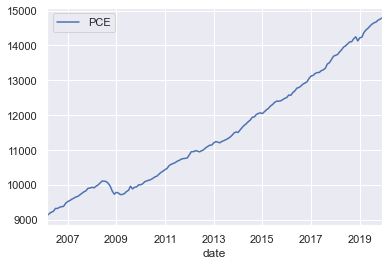

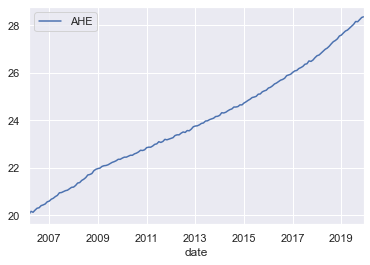

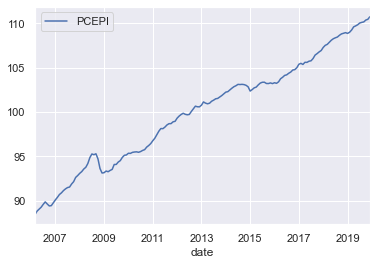

In [8]:
print(df_hw6[['PCE']].plot())
print(df_hw6[['AHE']].plot())
print(df_hw6[['PCEPI']].plot())

In [9]:
df_hw6.corr()

,PCE,AHE,PCEPI
PCE,1.000000,0.988292,0.973768
AHE,0.988292,1.000000,0.988329
PCEPI,0.973768,0.988329,1.000000


<AxesSubplot:>

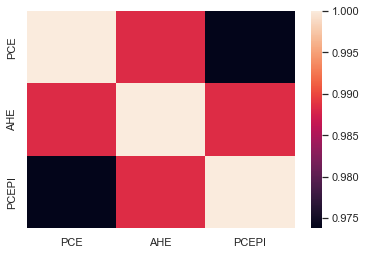

In [10]:
sns.heatmap(df_hw6.corr())

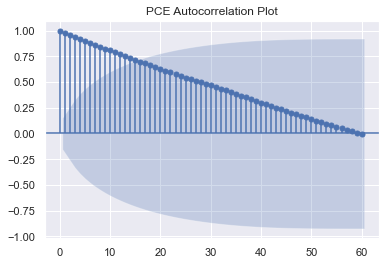

In [11]:
p = plot_acf(df_hw6['PCE'], lags=60, title='PCE Autocorrelation Plot')

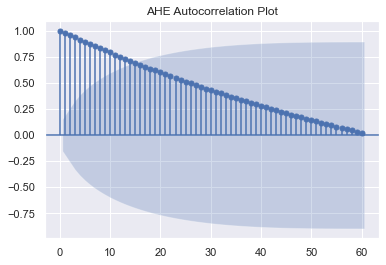

In [12]:
p2 = plot_acf(df_hw6['AHE'], lags=60, title='AHE Autocorrelation Plot')

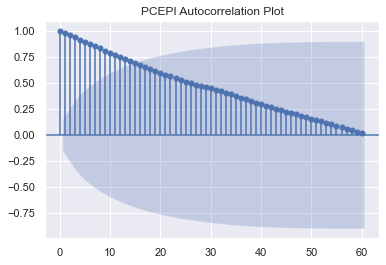

In [13]:
p3 = plot_acf(df_hw6['PCEPI'], lags=60, title='PCEPI Autocorrelation Plot')

In [14]:
from statsmodels.tsa.stattools import kpss, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from copy import deepcopy

def adf_test(timeseries):
    print ('Dickey-Fuller Test Result:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#define KPSS
def kpss_test(timeseries, trend='c'):
    print ('KPSS Test Result:')
    kpsstest = kpss(timeseries, regression=trend)
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [15]:
adf_test(df_hw6['PCE'])
adf_test(df_hw6['AHE'])
adf_test(df_hw6['PCEPI'])

Dickey-Fuller Test Result:
Test Statistic                   2.189889
p-value                          0.998874
#Lags Used                       2.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64
Dickey-Fuller Test Result:
Test Statistic                   1.680032
p-value                          0.998079
#Lags Used                       9.000000
Number of Observations Used    156.000000
Critical Value (1%)             -3.472979
Critical Value (5%)             -2.880252
Critical Value (10%)            -2.576747
dtype: float64
Dickey-Fuller Test Result:
Test Statistic                  -0.434152
p-value                          0.904239
#Lags Used                       1.000000
Number of Observations Used    164.000000
Critical Value (1%)             -3.470866
Critical Value (5%)             -2.879330
Critical Value (10%)            -2.576255
dtype: 

In [16]:
adf_pce = adfuller(df_hw6['PCE'])
ad_fuller_pval = adf_pce[1]

if ad_fuller_pval <= 0.05:
    print('stationarity from ad_fuller test: TRUE')
else:
    print('stationarity from ad_fuller test: FALSE')

stationarity from ad_fuller test: FALSE


In [17]:
adf_ahe = adfuller(df_hw6['AHE'])
ad_fuller_pval = adf_ahe[1]

if ad_fuller_pval <= 0.05:
    print('stationarity from ad_fuller test: TRUE')
else:
    print('stationarity from ad_fuller test: FALSE')

stationarity from ad_fuller test: FALSE


In [18]:
adf_pcepi = adfuller(df_hw6['PCEPI'])
ad_fuller_pval = adf_pcepi[1]

if ad_fuller_pval <= 0.05:
    print('stationarity from ad_fuller test: TRUE')
else:
    print('stationarity from ad_fuller test: FALSE')

stationarity from ad_fuller test: FALSE


In [19]:
kpss_test(df_hw6['PCE'])
kpss_test(df_hw6['AHE'])
kpss_test(df_hw6['PCEPI'])

KPSS Test Result:
Test Statistic            1.190019
p-value                   0.010000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
KPSS Test Result:
Test Statistic            1.207634
p-value                   0.010000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
KPSS Test Result:
Test Statistic            1.206769
p-value                   0.010000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [20]:
kpss_pce = kpss(df_hw6['PCE'])
kpss_pval = kpss_pce[1]

if kpss_pval >= 0.05:
    print('stationarity from kpss_fuller test: TRUE')
else:
    print('stationarity from kpss_fuller test: FALSE')

stationarity from kpss_fuller test: FALSE


In [21]:
kpss_ahe = kpss(df_hw6['AHE'])
kpss_pval = kpss_ahe[1]

if kpss_pval >= 0.05:
    print('stationarity from kpss_fuller test: TRUE')
else:
    print('stationarity from kpss_fuller test: FALSE')

stationarity from kpss_fuller test: FALSE


In [22]:
kpss_pcepi = kpss(df_hw6['PCEPI'])
kpss_pval = kpss_pcepi[1]

if kpss_pval >= 0.05:
    print('stationarity from kpss_fuller test: TRUE')
else:
    print('stationarity from kpss_fuller test: FALSE')

stationarity from kpss_fuller test: FALSE


### 1.B. 10 pts Give a summary of your findings
- Reading in the data we can observe three variables aside from `date`: 
    - PCE, Personal consumptions expenditures is the primary measure of consumer spending on goods and services in the US economy.
    - AHE, Average hourly earnings (dollars per hour) and reported monthly
    - PCEPI, Personal consumptions expenditures price index is a measure of the average increase in prices for all domestic personal consumption. 
- Visually inspecting our data in a plot, we can observe a positive upward trend over time for all variables.
- There are 166 data points in our series, with a mean PCE of 11507.87 and standard deviation of 1630.58; mean AHE of 23.94 and sd of 2.24; and PCEPI mean of 100.01 and sd 6.03. The data points are recorded between a time period of March 2006 to December 2019.
- We conduct a check for null or missing values and find there are no missing values.
- There is correlation found between the relationship of all variables (according to our heatmap created)
- The ADF and KPSS test reveal that the time series is not stationary for all three variables

## Part 2. 40 pts – Granger Causality

### 2.A. 8 pts Consider PCE and AHE, give an intuitive description of the relationship between the two economic measures. This is your opinion, looking for logic and understanding not right or wrong
- Given the context provided by the descriptions offered for each of these variables (PCE and AHE), and given our existing knowledge of personal expenditure, and of hourly wages, we can propose the relationship between the two is positively correlated.
- In other words, as hourly wages rise, so does personal expenditures (on average). This linkage is intuitive. It can also be said that as personal expenditures rise, generally you will discover hourly wages increase as well. This is not as intuitive and has lower likelihood to occur in comparison to when hourly wages rise, so does personal expenditures
- Our EDA heatmap shows a strong correlation between PCE and AHE providing evidence that they are closely linked

### 2.B. 8 pts Difference the two variables

In [23]:
df_hw6['PCE_diff'] = df_hw6['PCE'].diff()
df_hw6['AHE_diff'] = df_hw6['AHE'].diff()
df_hw6['PCEPI_diff'] = df_hw6['PCEPI'].diff()
df_hw6

,PCE,AHE,PCEPI,PCE_diff,AHE_diff,PCEPI_diff
date,,,,,,
2006-03-01,9122.1,20.04,88.473,NaN,NaN,NaN
2006-04-01,9174.8,20.17,88.850,52.7,0.13,0.377
2006-05-01,9215.1,20.13,89.070,40.3,-0.04,0.220
2006-06-01,9240.8,20.22,89.285,25.7,0.09,0.215
2006-07-01,9322.6,20.30,89.601,81.8,0.08,0.316
...,...,...,...,...,...,...
2019-08-01,14650.9,28.16,110.115,39.0,0.12,0.073
2019-09-01,14673.2,28.15,110.167,22.3,-0.01,0.052
2019-10-01,14728.5,28.24,110.377,55.3,0.09,0.210


### 2.C. 8 pts Check Granger Causality for the direction you stated in 2A, return plot of results

In [24]:
from statsmodels.tsa.stattools import grangercausalitytests, q_stat

In [25]:
df = df_hw6[['PCE_diff', 'AHE_diff']].dropna()

In [26]:
df.head()

,PCE_diff,AHE_diff
date,,
2006-04-01,52.7,0.13
2006-05-01,40.3,-0.04
2006-06-01,25.7,0.09
2006-07-01,81.8,0.08
2006-08-01,-0.8,0.02


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


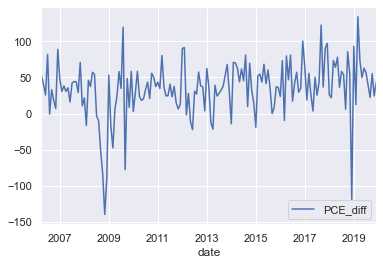

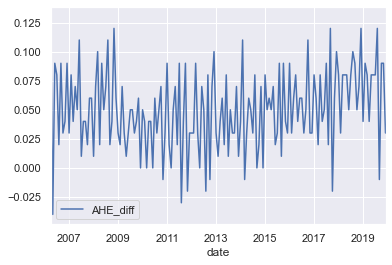

In [27]:
print(df[['PCE_diff']].plot())
print(df[['AHE_diff']].plot())

In [28]:
alpha=0.05

In [29]:
granger_results = grangercausalitytests(df, maxlag=11, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0285  , p=0.8662  , df_denom=161, df_num=1
ssr based chi2 test:   chi2=0.0290  , p=0.8648  , df=1
likelihood ratio test: chi2=0.0290  , p=0.8648  , df=1
parameter F test:         F=0.0285  , p=0.8662  , df_denom=161, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1227  , p=0.8846  , df_denom=158, df_num=2
ssr based chi2 test:   chi2=0.2531  , p=0.8811  , df=2
likelihood ratio test: chi2=0.2529  , p=0.8812  , df=2
parameter F test:         F=0.1227  , p=0.8846  , df_denom=158, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1740  , p=0.9138  , df_denom=155, df_num=3
ssr based chi2 test:   chi2=0.5457  , p=0.9087  , df=3
likelihood ratio test: chi2=0.5448  , p=0.9089  , df=3
parameter F test:         F=0.1740  , p=0.9138  , df_denom=155, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5205  , p=0.7208  

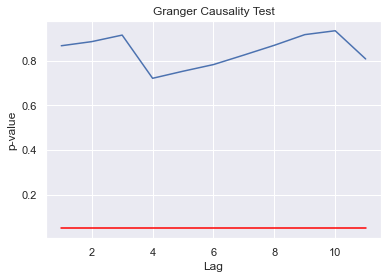

In [30]:
res_list = []
for lag, v in granger_results.items():
    res = {}
    res['Lag'] = lag
    for test, stats in v[0].items():
        res[test] = stats[1]

    res_list.append(res)

pvals = pd.DataFrame(res_list)
pvals.set_index('Lag', inplace=True)
pvals_graph = pvals['params_ftest']

pvals_graph.plot(title='Granger Causality Test')
alpha_ser = pd.Series([alpha]*len(pvals_graph), index=pvals_graph.index)
alpha_ser.plot(color='red')
plt.ylabel('p-value')
plt.show()

### 2.D. 8 pts Check Granger Causality for the opposite direction you stated in 2A, return plot of results

In [31]:
df = df_hw6[['AHE_diff', 'PCE_diff']].dropna()

In [32]:
df.head()

,AHE_diff,PCE_diff
date,,
2006-04-01,0.13,52.7
2006-05-01,-0.04,40.3
2006-06-01,0.09,25.7
2006-07-01,0.08,81.8
2006-08-01,0.02,-0.8


In [33]:
granger_results = grangercausalitytests(df, maxlag=11, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0186  , p=0.8917  , df_denom=161, df_num=1
ssr based chi2 test:   chi2=0.0189  , p=0.8906  , df=1
likelihood ratio test: chi2=0.0189  , p=0.8906  , df=1
parameter F test:         F=0.0186  , p=0.8917  , df_denom=161, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1373  , p=0.3233  , df_denom=158, df_num=2
ssr based chi2 test:   chi2=2.3466  , p=0.3094  , df=2
likelihood ratio test: chi2=2.3298  , p=0.3119  , df=2
parameter F test:         F=1.1373  , p=0.3233  , df_denom=158, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7396  , p=0.1612  , df_denom=155, df_num=3
ssr based chi2 test:   chi2=5.4546  , p=0.1414  , df=3
likelihood ratio test: chi2=5.3648  , p=0.1470  , df=3
parameter F test:         F=1.7396  , p=0.1612  , df_denom=155, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.7223  , p=0.1479  

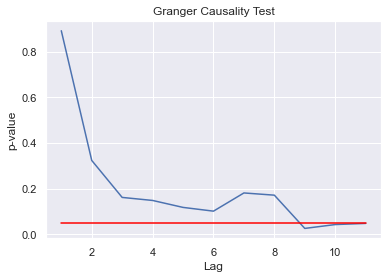

In [34]:
res_list = []
for lag, v in granger_results.items():
    res = {}
    res['Lag'] = lag
    for test, stats in v[0].items():
        res[test] = stats[1]

    res_list.append(res)

pvals = pd.DataFrame(res_list)
pvals.set_index('Lag', inplace=True)
pvals_graph = pvals['params_ftest']

pvals_graph.plot(title='Granger Causality Test')
alpha_ser = pd.Series([alpha]*len(pvals_graph), index=pvals_graph.index)
alpha_ser.plot(color='red')
plt.ylabel('p-value')
plt.show()

### 2.E. 8 pts Summarize your findings. You must understand the underlying null hypothesis of test.
- We interpret the underlying null hypothesis of the Granger test as such:
    - Lagged x values are not a good explanatory variable for variation in y
- When first creating our dataframe where var1 = PCE and var2 = AHE, the p-values found were higher than 0.01 through all periods which means we cannot reject the null hypothesis here
- Then when switching our dataframe to have var1 = AHE and var2 = PCE, the p-values found when running ADF and KPSS tests are higher than 0.01 until the 9th lag, which means we can reject the null hypothesis



## Part 3. 40 pts – VARMA modeling

### 3.A. 8 pts Using differenced data, run a search to find the best fit order for AH, PCE, and PCEIP, return a plot

### First check for stationarity

In [35]:
adf_test(df_hw6['PCE_diff'].dropna())
adf_test(df_hw6['AHE_diff'].dropna())
adf_test(df_hw6['PCEPI_diff'].dropna())

Dickey-Fuller Test Result:
Test Statistic                -6.605709e+00
p-value                        6.564988e-09
#Lags Used                     1.000000e+00
Number of Observations Used    1.630000e+02
Critical Value (1%)           -3.471119e+00
Critical Value (5%)           -2.879441e+00
Critical Value (10%)          -2.576314e+00
dtype: float64
Dickey-Fuller Test Result:
Test Statistic                  -1.012276
p-value                          0.748761
#Lags Used                      14.000000
Number of Observations Used    150.000000
Critical Value (1%)             -3.474715
Critical Value (5%)             -2.881009
Critical Value (10%)            -2.577151
dtype: float64
Dickey-Fuller Test Result:
Test Statistic                -7.507425e+00
p-value                        4.099451e-11
#Lags Used                     0.000000e+00
Number of Observations Used    1.640000e+02
Critical Value (1%)           -3.470866e+00
Critical Value (5%)           -2.879330e+00
Critical Value (10%)   

In [36]:
adf_pcediff = adfuller(df_hw6['PCE_diff'].dropna())
ad_fuller_pval = adf_pcediff[1]

if ad_fuller_pval <= 0.05:
    print('stationarity from ad_fuller test: TRUE')
else:
    print('stationarity from ad_fuller test: FALSE')

stationarity from ad_fuller test: TRUE


In [37]:
adf_ahediff = adfuller(df_hw6['AHE_diff'].dropna())
ad_fuller_pval = adf_ahediff[1]

if ad_fuller_pval <= 0.05:
    print('stationarity from ad_fuller test: TRUE')
else:
    print('stationarity from ad_fuller test: FALSE')

stationarity from ad_fuller test: FALSE


In [38]:
adf_pcepidiff = adfuller(df_hw6['PCEPI_diff'].dropna())
ad_fuller_pval = adf_pcepidiff[1]

if ad_fuller_pval <= 0.05:
    print('stationarity from ad_fuller test: TRUE')
else:
    print('stationarity from ad_fuller test: FALSE')

stationarity from ad_fuller test: TRUE


In [39]:
kpss_test(df_hw6['PCE_diff'].dropna())
kpss_test(df_hw6['AHE_diff'].dropna())
kpss_test(df_hw6['PCEPI_diff'].dropna())

KPSS Test Result:
Test Statistic            0.487339
p-value                   0.044518
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
KPSS Test Result:
Test Statistic            0.456203
p-value                   0.052930
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
KPSS Test Result:
Test Statistic            0.094052
p-value                   0.100000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [40]:
kpss_pcediff = kpss(df_hw6['PCE_diff'].dropna())
kpss_pval = kpss_pcediff[1]

if kpss_pval >= 0.05:
    print('stationarity from kpss_fuller test: TRUE')
else:
    print('stationarity from kpss_fuller test: FALSE')

stationarity from kpss_fuller test: FALSE


In [41]:
kpss_ahediff = kpss(df_hw6['AHE_diff'].dropna())
kpss_pval = kpss_ahediff[1]

if kpss_pval >= 0.05:
    print('stationarity from kpss_fuller test: TRUE')
else:
    print('stationarity from kpss_fuller test: FALSE')

stationarity from kpss_fuller test: TRUE


In [42]:
kpss_pcepidiff = kpss(df_hw6['PCEPI_diff'].dropna())
kpss_pval = kpss_pcepidiff[1]

if kpss_pval >= 0.05:
    print('stationarity from kpss_fuller test: TRUE')
else:
    print('stationarity from kpss_fuller test: FALSE')

stationarity from kpss_fuller test: TRUE


### We find PCE and AHE is not yet stationary, so we continue and take a second difference.

In [43]:
df_hw6['PCE_diff2'] = df_hw6['PCE_diff'].diff()
df_hw6['AHE_diff2'] = df_hw6['AHE_diff'].diff()

In [44]:
adf_test(df_hw6['PCE_diff2'].dropna())
adf_test(df_hw6['AHE_diff2'].dropna())

Dickey-Fuller Test Result:
Test Statistic                -7.010086e+00
p-value                        6.958047e-10
#Lags Used                     8.000000e+00
Number of Observations Used    1.550000e+02
Critical Value (1%)           -3.473259e+00
Critical Value (5%)           -2.880374e+00
Critical Value (10%)          -2.576812e+00
dtype: float64
Dickey-Fuller Test Result:
Test Statistic                  -5.351745
p-value                          0.000004
#Lags Used                      13.000000
Number of Observations Used    150.000000
Critical Value (1%)             -3.474715
Critical Value (5%)             -2.881009
Critical Value (10%)            -2.577151
dtype: float64


In [45]:
adf_pcediff2 = adfuller(df_hw6['PCE_diff2'].dropna())
ad_fuller_pval = adf_pcediff2[1]

if ad_fuller_pval <= 0.05:
    print('stationarity from ad_fuller test: TRUE')
else:
    print('stationarity from ad_fuller test: FALSE')

stationarity from ad_fuller test: TRUE


In [46]:
adf_ahediff2 = adfuller(df_hw6['AHE_diff2'].dropna())
ad_fuller_pval = adf_ahediff2[1]

if ad_fuller_pval <= 0.05:
    print('stationarity from ad_fuller test: TRUE')
else:
    print('stationarity from ad_fuller test: FALSE')

stationarity from ad_fuller test: TRUE


In [47]:
kpss_test(df_hw6['PCE_diff'].dropna())
kpss_test(df_hw6['AHE_diff'].dropna())

KPSS Test Result:
Test Statistic            0.487339
p-value                   0.044518
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
KPSS Test Result:
Test Statistic            0.456203
p-value                   0.052930
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [48]:
kpss_pcediff2 = kpss(df_hw6['PCE_diff2'].dropna())
kpss_pval = kpss_pcediff2[1]

if kpss_pval >= 0.05:
    print('stationarity from kpss_fuller test: TRUE')
else:
    print('stationarity from kpss_fuller test: FALSE')

stationarity from kpss_fuller test: TRUE


In [49]:
kpss_ahediff2 = kpss(df_hw6['AHE_diff2'].dropna())
kpss_pval = kpss_ahediff2[1]

if kpss_pval >= 0.05:
    print('stationarity from kpss_fuller test: TRUE')
else:
    print('stationarity from kpss_fuller test: FALSE')

stationarity from kpss_fuller test: TRUE


In [50]:
df_hw6

,PCE,AHE,PCEPI,PCE_diff,AHE_diff,PCEPI_diff,PCE_diff2,AHE_diff2
date,,,,,,,,
2006-03-01,9122.1,20.04,88.473,NaN,NaN,NaN,NaN,NaN
2006-04-01,9174.8,20.17,88.850,52.7,0.13,0.377,NaN,NaN
2006-05-01,9215.1,20.13,89.070,40.3,-0.04,0.220,-12.4,-0.17
2006-06-01,9240.8,20.22,89.285,25.7,0.09,0.215,-14.6,0.13
2006-07-01,9322.6,20.30,89.601,81.8,0.08,0.316,56.1,-0.01
...,...,...,...,...,...,...,...,...
2019-08-01,14650.9,28.16,110.115,39.0,0.12,0.073,-17.1,0.04
2019-09-01,14673.2,28.15,110.167,22.3,-0.01,0.052,-16.7,-0.13
2019-10-01,14728.5,28.24,110.377,55.3,0.09,0.210,33.0,0.10


In [51]:
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [52]:
varma_df = df_hw6[['PCE','AHE', 'PCEPI']].dropna()
train = varma_df[:-13]
test = varma_df[-13:]

In [ ]:
var_df = df_hw6[['PCE_diff2','AHE_diff2', 'PCEPI_diff']].dropna()
train_var = var_df[:-12]
test_var = var_df[-12:]

In [53]:
prange = range(0,4)
qrange = range(1,4)
max_aic = np.inf
best_order = None

print('Running search of VARMA')

for p in prange:
    for q in qrange:
        order = (p, q)
        varma_model = VARMAX(train, order=order).fit(disp=False)
        current_aic = varma_model.aic
        print('\t Order is', order, 'with AIC of', current_aic)
        if current_aic < max_aic:
            max_aic = current_aic 
            best_order = order

print('Best VARMA order is', best_order, 'with AIC of', max_aic)

max_aic_var = np.inf
best_order_var = None
print('Running search of VAR')
for p in prange:
    order = (p, 0)
    var_model = VAR(train).fit(p)
    current_aic = var_model.aic
    print('\t Order is', order, 'with AIC of', current_aic)
    if current_aic < max_aic_var:
        max_aic_var = current_aic 
        best_order_var = order

print('Best VAR order is', best_order_var, 'with AIC of', max_aic_var)

Running search of VARMA
	 Order is (0, 1) with AIC of 2976.4689854739536
	 Order is (0, 2) with AIC of 2809.5952392086024
	 Order is (0, 3) with AIC of 2743.4727583601257
	 Order is (1, 1) with AIC of 4190.587471245757
	 Order is (1, 2) with AIC of 3299.6953082552327
	 Order is (1, 3) with AIC of 2934.0823954687203
	 Order is (2, 1) with AIC of 7604.519934431419
	 Order is (2, 2) with AIC of 5287.021070963516
	 Order is (2, 3) with AIC of 5432.9257874641
	 Order is (3, 1) with AIC of 7622.711215076324
	 Order is (3, 2) with AIC of 3910.257863053614
	 Order is (3, 3) with AIC of 4041.8823431041283
Best VARMA order is (0, 3) with AIC of 2743.4727583601257
Running search of VAR
	 Order is (0, 0) with AIC of 12.243589209130011
	 Order is (1, 0) with AIC of -3.318112474025674
	 Order is (2, 0) with AIC of -3.836365379790318
	 Order is (3, 0) with AIC of -3.958260862334113
Best VAR order is (3, 0) with AIC of -3.958260862334113


### 3.B. 8 pts Fit the VAR model with chosen order, return the model summary.

In [54]:
var_model = VAR(train_var).fit(3)
var_model.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 20, May, 2022
Time:                     22:13:55
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -2.66891
Nobs:                     149.000    HQIC:                  -3.02800
Log likelihood:          -360.373    FPE:                  0.0378880
AIC:                     -3.27373    Det(Omega_mle):       0.0311795
--------------------------------------------------------------------
Results for equation PCE_diff2
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 8.268690         4.077713            2.028           0.043
L1.PCE_diff2         -0.837177         0.097068           -8.625           0.000
L1.AHE_diff2         34.210357        99.337099         

### 3.C. 8 pts Explain the values in the correlation matrix of residuals. What are the implications for the model fit?
- Our correlation matrix of residuals show values of 1 diagonally when starting from `i_1,j_1` to `i_3,j_3`. This denotes perfect correlation between corresponding variables identical to itself, which we expect. We also expect residuals to have no linear correlation between two different variables, which would be represented by 0 in cells between them. This is not the case. We know that the further away the correlation coefficient is from zero, the stronger the relationship between the two variables.
- Between `PCE_diff2` and `AHE_diff2`, the values created due to PCE and AHE not reaching stationarity until second differencing, there is actually slightly negative linear correlation between the two variables
- There is a moderate amount of positive correlation between PCE and PCEPI residuals probably due to PCEPI being the measure of the average increase in prices for all domestic personal consumption, or PCE. Higher PCE is strongly related to higher PCEPI.
- The fact that we can determine if there are patterns in the residuals means we need to adjust our model fit. However, this just means that we're able to improve the fit of the model by moving this predictability over to the deterministic side of things (i.e., independent variables).


In [55]:
var_model.test_whiteness(signif =0.05).summary()

Test statistic,Critical value,p-value,df
88.08,82.53,0.020,63


### 3.D. 8 pts Create 12 periods of forecast for all three variables, return plots of predicted values against actual values, Return variable level RMSE (3 total)

In [64]:
yhat = var_model.forecast(var_model.endog, steps=12)
print(yhat)

[[ 1.42211364e+02 -4.72655345e-02 -6.91834763e-02]
 [-3.57013427e+00 -1.21060088e-02  5.90154870e-02]
 [-3.44040085e+01  3.60343202e-02  1.57984774e-01]
 [ 9.75050829e+00 -1.01603159e-02  1.16937007e-01]
 [ 1.83637543e+01 -2.08635871e-02  1.21521785e-01]
 [-1.41011657e+01  2.14545543e-02  1.44269794e-01]
 [-3.06970124e+00 -4.87780347e-04  1.27305439e-01]
 [ 6.05082825e+00 -1.19124139e-02  1.21775467e-01]
 [-3.13982527e-01  7.72711943e-03  1.30720185e-01]
 [-4.04555564e+00  2.68002072e-03  1.27091420e-01]
 [ 1.46279842e+00 -5.78650559e-03  1.25328905e-01]
 [ 1.15486075e+00  2.42460819e-03  1.27895050e-01]]


In [65]:
# clean up yhat
idx=test_var.index
df_preds = pd.DataFrame(yhat).set_index(idx)
df_preds.rename(columns={0: 'PCE_forecast', 1: 'AHE_forecast', 2: 'PCEPI_forecast'}, inplace=True)

### Plots of predicted values (PCE_diff2, AHE_diff2, PCEPI_diff) against actual values (PCE, AHE, PCEPI)

<AxesSubplot:xlabel='date'>

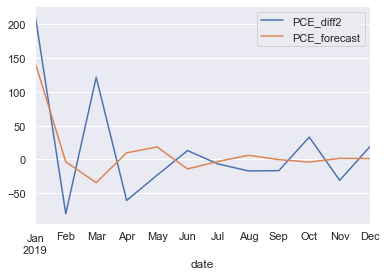

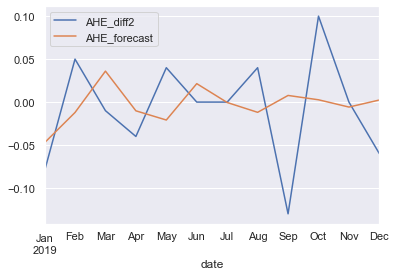

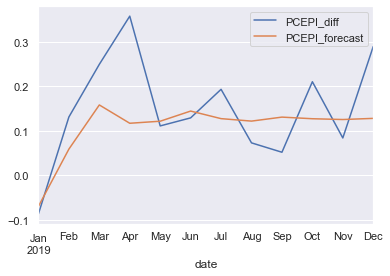

In [69]:
df_results = pd.concat([test_var,df_preds], axis=1)
df_results[['PCE_diff2', 'PCE_forecast', ]].plot()
df_results[['AHE_diff2', 'AHE_forecast', ]].plot()
df_results[['PCEPI_diff', 'PCEPI_forecast']].plot()

### Summing forecasts for all 12 periods

In [71]:
df_preds.rename(columns={'PCE_forecast':'PCE', 
                         'AHE_forecast': 'AHE',
                         'PCEPI_forecast': 'PCEPI'}, inplace=True)

forecast_result = pd.concat([df_hw6[-13:-12][['PCE', 'PCEPI']], df_preds[['PCE', 'PCEPI']]], axis=0).reset_index(drop=True)\
                    .cumsum()\
                    .drop([0])\
                    .set_index(idx)

forecast_result.columns = ['PCE_forecast', 'PCEPI_forecast']

### Cumulative plots of predicted values (PCE_diff2, AHE_diff2, PCEPI_diff) against actual values (PCE, AHE, PCEPI)

<AxesSubplot:xlabel='date'>

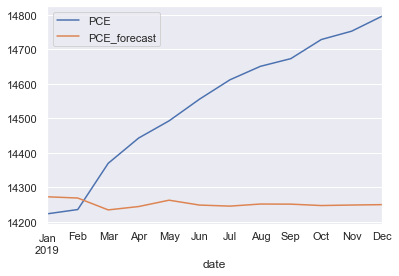

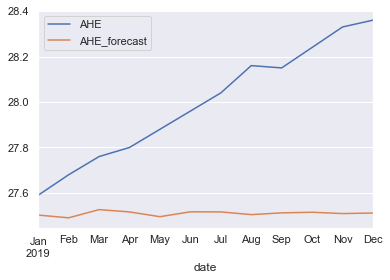

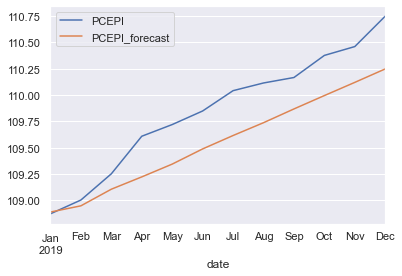

In [79]:
forecast_pce = pd.concat([df_hw6[-12:]['PCE'],forecast_result[['PCE_forecast']]], axis=1)
forecast_pce.plot()

# AHE second difference - double cumsum
forecast_result2 = pd.concat([df_hw6[-13:-12][['AHE']],df_preds[['AHE']]], axis=0).reset_index(drop=True)\
                    .cumsum()\
                    .drop([0])\
                    .set_index(idx)

forecast_result2.columns=['AHE_forecast']

forecast_ahe = pd.concat([df_hw6[-12:]['AHE'],forecast_result2[['AHE_forecast']]], axis=1)
forecast_ahe.plot()

forecast_pcepi = pd.concat([df_hw6[-12:]['PCEPI'],forecast_result[['PCEPI_forecast']]], axis=1)
forecast_pcepi.plot()


In [81]:
print('RMSE for PCE:', 
      str(sqrt(mean_squared_error(df_hw6[-12:]['PCE'],forecast_result['PCE_forecast']))))
print('RMSE for AHE:',
      str(sqrt(mean_squared_error(df_hw6[-12:]['AHE'],forecast_result2['AHE_forecast']))))
print('RMSE for PCEPI:', 
      str(sqrt(mean_squared_error(df_hw6[-12:]['PCEPI'],forecast_result['PCEPI_forecast']))))

RMSE for PCE: 349.00976130007064
RMSE for AHE: 0.5439533445477153
RMSE for PCEPI: 0.33799341575740377


### 3.E. 8 pts What is the advantage of this VAR model? What would ARIMA or prophet models on this dataset look like, if we were asked to forecast AHE?
- One advantage of VAR models is that their estimate is flexible and less demanding in information (i.e., the amount of data points) and time. For example, we only had 166 total data points in this subset and was able to create a sufficient VAR model with relatively low error for at least two of our variables
- In addition, these models allow easily integrating new data.
- VAR models also differ from univariate autoregressive models (such as ARIMA or prophet) because they allow feedback to occur between the variables in the model. For example, we used a VAR model to show how PCE is a function of AHE, and in turn, also show how AHE is a function of PCE.
- I think at least in terms of the predicted value (non-cumulative plots), ARIMA or prophet would probably be able to more accurately predict the data, or at least have a better fit along the curve. The way it would do this would be to either forecast AHE as the uni-variable, and then add PCE as the exogeneous variable. 
- To summarize, a VAR will produce multivariate forecasts with uncertainty jointly determined by errors of multiple series (covariance matrix), while Prophet will produce univariate forecasts with uncertainty based on errors from a single series (variance scalar).